In [1]:
import pandas as pd

[0.51786334 0.16002144 0.32729411]


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:21: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, u

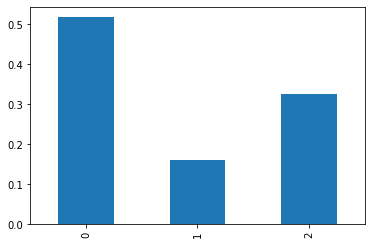

In [134]:
df1 = pd.read_feather('../input/pet-data/df_allfeats_4nd.ftr')
#df1['AdoptionSpeed'] += pd.read_csv('../input/pet-data/df1_train_test_v3.csv')['AdoptionSpeed']
#df1['AdoptionSpeed'] /= 2
df2 = pd.read_csv('../input/pet-data/df2.csv')

#df1.to_csv('train_last_comp.csv', index=False)
df = pd.merge(df2, df1.drop('PetID', axis=1), how='left', on='hash')

train = pd.read_csv('../input/petfinder-pawpularity-score/train.csv')['Id'].map(lambda x:str(f'../input/petfinder-pawpularity-score/train/{x}.jpg'))
oof = pd.concat([train,
                 pd.read_csv('../input/petfinder-ensumble/exp085_ensumble/exp085_ensumble_oof.csv')['oof']], 
                 axis=1).set_index('Id')['oof']/100
oof2 = pd.concat([train,
                 pd.read_csv('../input/exp108/exp108_oof.csv')['pred']], 
                 axis=1).set_index('Id')['pred']/100


#df['pred4'] = df['path_x'].map(pd.read_csv('../input/pet-data/ens_exp15.csv', index_col='path')['pred'])
df['pred1'] = df['path'].map(pd.read_csv('../input/pet-data/ens_exp4-7-8-9-15.csv', index_col='path')['pred'])
df['pred2'] = df['path'].map(oof)
df['pred3'] = df['path'].map(oof2)

coef = np.linalg.lstsq(df[['pred1', 'pred2', 'pred3']], df['Pawpularity'] / 100)[0]
print(coef)
pd.Series(coef).plot(kind='bar')

df['pred'] = np.dot(df[['pred1', 'pred2', 'pred3']], coef)
df.to_feather('df_allfeats_4nd_merged.ftr')

In [135]:
df.shape

(9999, 249)

In [131]:
df1 = pd.read_feather('best_1st.ftr').drop_duplicates(subset=['PetID', 'hash'])
df2 = pd.read_feather('best_2nd.ftr').drop_duplicates(subset=['PetID', 'hash'])
df3 = pd.read_feather('best_4nd.ftr').drop_duplicates(subset=['PetID', 'hash'])

In [130]:
df1.shape, df2.shape, df3.shape

((71835, 158), (71835, 47), (71835, 30))

In [132]:
tmp = pd.merge(df1, df2, how='inner', on=['PetID', 'hash'])
tmp = pd.merge(tmp, df3, how='inner', on=['PetID', 'hash'])

In [133]:
tmp = tmp.rename({c : c.replace(' ', '_') for c in 
                ['General Health_main_breed_all',
                 'Affectionate with Family',
                 'Friendly Toward Strangers_main_breed_all']}, axis=1)

tmp.to_feather('../input/pet-data/df_allfeats_4nd.ftr')

In [137]:
pd.read_feather('df_allfeat_merged.ftr').shape, pd.read_feather('df_allfeats_4nd_merged.ftr').shape

((9999, 221), (9999, 249))

In [138]:
res = []
for line in open('res_final.csv'):
    ret = line.strip().split()
    fi = ret[0]
    sc = float(ret[-1])
    res.append([line.split('AAA')[1], sc])
pd.options.display.max_rows = 1000
aaa = pd.DataFrame(res, columns=['f', 's']).sort_values('s', ascending=True)
aaa.head(20)

,f,s
76,169 dense121_2_218 16.74279009044769\n,16.742790
89,180 inception_resnet_338 16.745254441801002\n,16.745254
84,176 gnvec45 16.7457802651044\n,16.745780
47,142 SVD_Description_42 16.74786405985567\n,16.747864
60,154 meta_label_score_max_STD 16.74832116201451\n,16.748321
45,140 gnvec233 16.748521292020506\n,16.748521
61,155 densenet121_g_svd_9 16.74915858642252\n,16.749159
83,175 dense121_2_232 16.749653417706252\n,16.749653
97,188 Friendly_Toward_Strangers_main_breed_all ...,16.749803
67,160 ratio_sum_MaturitySize_groupby_Type_Breed...,16.749986


In [109]:
aaa[aaa.f.str.find('prd') > -1]

,f,s


In [102]:
#AAA None None 16.82667320441962

In [66]:
tmp = pd.read_csv('res_1st.csv', sep=' ', header=None).sort_values(1).reset_index(drop=True)#[2]#.plot.bar()
tmp = tmp.set_index(1)
tmp.sort_values(2)

,0,2
1,,
159,log1/out_159.txt:AAA,16.816028
152,log1/out_152.txt:AAA,16.816356
123,log1/out_123.txt:AAA,16.818385
107,log1/out_107.txt:AAA,16.818505
143,log1/out_143.txt:AAA,16.822295
...,...,...
18,log1/out_18.txt:AAA,17.006814
13,log1/out_13.txt:AAA,17.042271
12,log1/out_12.txt:AAA,17.052367


In [68]:
np.load('opt_final.npy').shape

(203,)

In [67]:
tmp = pd.read_csv('res_2nd.csv', sep=' ', header=None).sort_values(1).reset_index(drop=True)#[2]#.plot.bar()
tmp = tmp.set_index(1)
tmp.sort_values(2)

,0,2
1,,
37,log2/out_37.txt:AAA,16.924197
48,log2/out_48.txt:AAA,16.928785
39,log2/out_39.txt:AAA,16.932638
45,log2/out_45.txt:AAA,16.932763
66,log2/out_66.txt:AAA,16.932961
...,...,...
389,log2/out_389.txt:AAA,17.038013
376,log2/out_376.txt:AAA,17.038308
386,log2/out_386.txt:AAA,17.041396


In [43]:
tmp.sort_values(2).head(10)

,0,2
1,,
37,log2/out_37.txt:AAA,16.924197
48,log2/out_48.txt:AAA,16.928785
39,log2/out_39.txt:AAA,16.932638
45,log2/out_45.txt:AAA,16.932763
66,log2/out_66.txt:AAA,16.932961
47,log2/out_47.txt:AAA,16.933339
52,log2/out_52.txt:AAA,16.935426
42,log2/out_42.txt:AAA,16.937377
50,log2/out_50.txt:AAA,16.937420


In [2]:
df_train = pd.read_feather('../input/prevfeats/X_train_t.feather')
df_test = pd.read_feather('../input/prevfeats/X_test_t.feather')

In [3]:
df_train.shape, df_test.shape

((14993, 150), (3972, 150))

In [25]:
df_all = pd.read_feather('../input/prevfeats/all_data.feather')
df_all.shape

(18965, 4852)

In [16]:
def proc(x):
    try:
        x.astype('float32')
        return True
    except ValueError:
        return False

In [19]:
cols = [col for col in df_all if proc(df_all[col]) and col != 'AdoptionSpeed']

In [6]:
df_train.columns

Index(['annots_score_normal_mean_mean', 'BreedName_second_breed',
       'inception_resnet_187', 'inception_resnet_373', 'dense121_2_249',
       'inception_resnet_197', 'dense121_2_172',
       'var_Age_groupby_RescuerID_State', 'gnvec249',
       'diff_var_Age_groupby_MaturitySize',
       ...
       'inception_resnet_215', 'dense121_2_9',
       'annots_score_normal_sum_median', 'inception_resnet_227',
       'var_Quantity_groupby_RescuerID', 'inception_resnet_237',
       'annots_score_normal_sum_max',
       'var_MaturitySize_groupby_RescuerID_State', 'inception_resnet_94',
       'glove_mag44'],
      dtype='object', length=150)

In [20]:
df_all = df_all[['PetID'] + cols]#df_train.columns.values.tolist()]

In [8]:
import numpy as np
import glob
import joblib
import os
from PIL import Image
import imagehash
from tqdm.auto import tqdm

paths = glob.glob('../input/petfinder-adoption-prediction/*/*jpg')

result = joblib.Parallel(n_jobs=-1, verbose=1)(joblib.delayed(lambda x: imagehash.average_hash(Image.open(x)))(path) for path in paths)


tmp = pd.DataFrame()
tmp['path'] = paths
tmp['hash'] = result
tmp['hash'] = tmp['hash'].astype(str)

tmp['is_train'] = tmp['path'].str.find('train') > -1
tmp['is_test'] = tmp['path'].str.find('test') > -1
tmp['idx'] = tmp['path'].map(lambda x: int(x.split('-')[-1][:-4]))
tmp['PetID'] = tmp['path'].map(lambda x: x.split('/')[-1].split('-')[0])

df1_train = pd.read_csv('../input/petfinder-adoption-prediction/train/train.csv')
df1_test = pd.read_csv('../input/petfinder-adoption-prediction/test/test.csv')

aaa = [df1_test['PetID'].map(pd.read_csv(path, index_col='PetID')['AdoptionSpeed']).values
 for path in ['../input/pet-data/prev1st.csv']]
aaa = np.mean([t for t in aaa if not np.isnan(t.sum())], axis=0)

#df1_test['AdoptionSpeed'] = aaa
df1_train = df1_train.append(df1_test)

df1 = pd.merge(tmp, df1_train, how='left', on='PetID')

df1['is_train'] = df1['is_train'].astype(np.float32)
df1['is_test'] = df1['is_train'].astype(np.float32)
df1['hash'] = df1['hash'].astype(str)
#df1 = df1[(df1['is_train'] > 0 ) | (~df1['hash'].isin(df1.loc[df1['is_train'] > 0, 'hash']))].reset_index(drop=True)
#df1.to_csv('df1_train_test_v6.csv', index=False)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done 1776 tasks      | elapsed:    2.4s
[Parallel(n_jobs=-1)]: Done 4576 tasks      | elapsed:    3.9s
[Parallel(n_jobs=-1)]: Done 8176 tasks      | elapsed:    5.8s
[Parallel(n_jobs=-1)]: Done 12576 tasks      | elapsed:    8.1s
[Parallel(n_jobs=-1)]: Done 17776 tasks      | elapsed:   10.8s
[Parallel(n_jobs=-1)]: Done 23776 tasks      | elapsed:   14.1s
[Parallel(n_jobs=-1)]: Done 30576 tasks      | elapsed:   17.6s
[Parallel(n_jobs=-1)]: Done 38176 tasks      | elapsed:   21.6s
[Parallel(n_jobs=-1)]: Done 46576 tasks      | elapsed:   26.0s
[Parallel(n_jobs=-1)]: Done 55776 tasks      | elapsed:   30.9s
[Parallel(n_jobs=-1)]: Done 65776 tasks      | elapsed:   36.2s
[Parallel(n_jobs=-1)]: Done 72776 out of 72776 | elapsed:   39.8s finished


In [21]:

df_all2 = pd.merge(df1[['PetID', 'AdoptionSpeed', 'hash']], df_all, on='PetID', how='left')

In [22]:
df_all2.to_csv('../input/pet-data/df1_train_test_all_3.csv', index=False)


KeyboardInterrupt



In [24]:
df_all2.to_feather('../input/pet-data/df1_train_test_all_3.ftr')

In [ ]:
df_all2[['AdoptionSpeed']].isna().mean()